# Prepare the setup

In [5]:
# Import packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [6]:
# Load the dataset
df = pd.read_csv("../data/old_training_dataset.csv")

First, we manually converted the dataset into a csv format because it is much easier to work with it.

We are already familiar with data being in a tabular format, and since we encountered some issues with the original one, the arff, we found this solution as being quick and suitable.

Initially we tried to make the conversion in code, but it did not work either.

# Initial exploration

In [7]:
# See the first 5 rows
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


From the initial dataset, we decided to remove the first column that represented the index of each row, as it was unnecessary for the later implementation.

In [8]:
# Print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

We can see each column name with all the non-null values and their type. As we already noted in the dataset description, we expected everything to be integer.

In [9]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see basic statistical information such as count, mean, standard deviation, minimum value, the quartiles, and maximum value.

In [10]:
# Check for null values
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In this case, we don't have any missing values, an information we have already observed above.

In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(5206)

We expected to have duplicates because the dataset contains values like -1, 0 and 1. If we drop them, we lose the entire information that we need to work with.

In [12]:
# Check target class
df['Result'].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

## Check for class imbalance

<Axes: xlabel='Result', ylabel='count'>

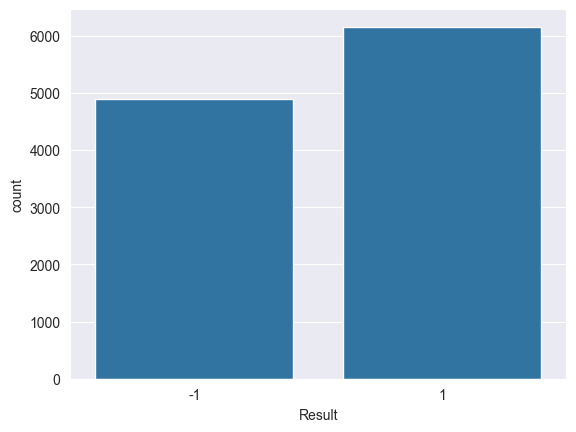

In [16]:
# Class distribution plot
sns.countplot(x='Result', data=df)

We wanted to highlight and create a visualization for the information we just checked in the previous cell.

As we can see, there is not a big difference between -1 and 1 in our target column, therefore we move on.

# Identify the meaning of -1 and 1

Result                             -1         1
having_IP_Address            0.213557  0.393536
URL_Length                  -0.682523 -0.593958
Shortining_Service           0.790118  0.697905
having_At_Symbol             0.658228  0.734286
double_slash_redirecting     0.770519  0.718369
Prefix_Suffix               -1.000000 -0.524119
having_Sub_Domain           -0.209473  0.281468
SSLfinal_State              -0.479788  0.832223
Domain_registeration_length -0.098408 -0.526393
Favicon                      0.628828  0.628390
port                         0.700286  0.750528
HTTPS_token                  0.708044  0.648855
Request_URL                 -0.092283  0.408803
URL_of_Anchor               -0.632095  0.365438
Links_in_tags               -0.330747  0.050999
SFH                         -0.784198 -0.445834
Submitting_to_email          0.619845  0.648205
Abnormal_URL                 0.753369  0.667046
Redirect                     0.122907  0.109956
on_mouseover                 0.731727  0

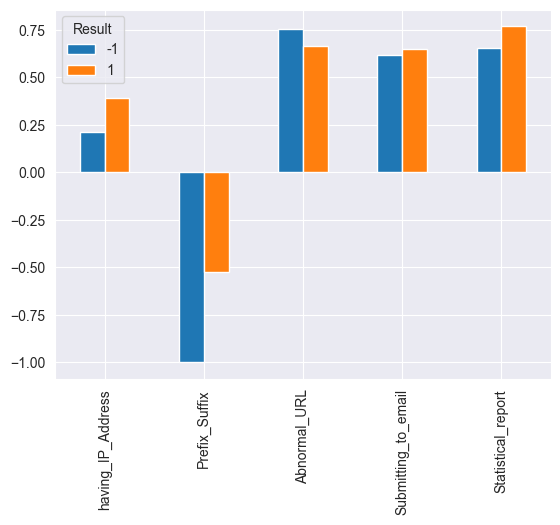

In [15]:
# Compare the average feature values for each Result class
feature_means = df.groupby('Result').mean().T
print(feature_means)

# We randomly selected some possible suspicious features
suspicious_features = ['having_IP_Address', 'Prefix_Suffix', 'Abnormal_URL', 'Submitting_to_email', 'Statistical_report']
# Analyze how they differ from each other
print("\nAverage values for suspicious features:")
print(feature_means.loc[suspicious_features])

# Compare them visually to get a better understanding
df.groupby("Result")[suspicious_features].mean().T.plot.bar()
plt.show()

From the initial output when comparing the averages, we noticed that 'Prefix_Suffix' is the only one with a perfect -1 value. Therefore, we investigated further.

In comparison with other features, the plot highlights phishing risks when it comes to 'Prefix_Suffix' due to the negative values that it has. From our understanding, the bigger the blue bar, the higher the risk, especially if it reaches -1.

From now on, we assume -1 means phishing and 1 represents the contrary. However, it is not clear how we can define 0, despite its absence in 'Result' column. It can show the not yet identified phishing cases or uncertain cases.

# More visualizations

## Feature Correlation Heatmap

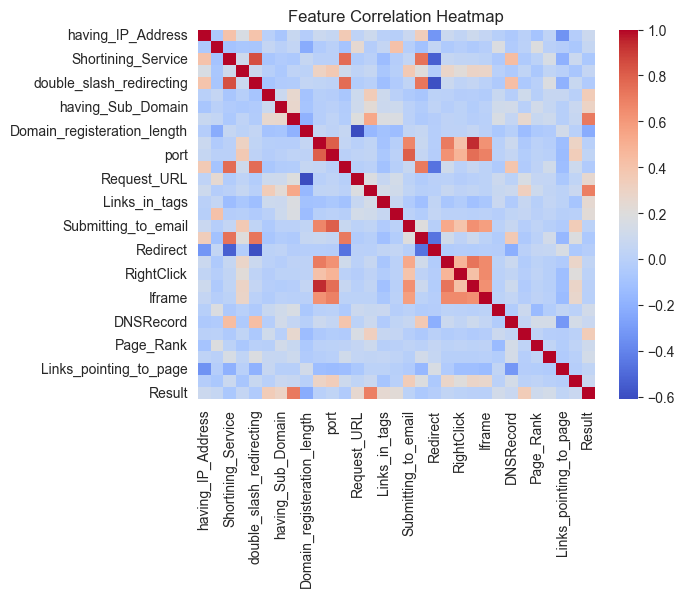

In [17]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

This visualization shows us the relationship between all features including the target 'Result'.

It is useful because it helps us detect multicollinearity. We learnt that too much correlation can affect some machine learning models, including, for example, linear ones. It could impact the future Logistic Regression model we want to implement, because it assumes feature independence.

This is not the case. What we focused on were the bright pink or red points found outside the diagonal. They represent a strong correlation between variables.

## Feature Correlation with 'Result'

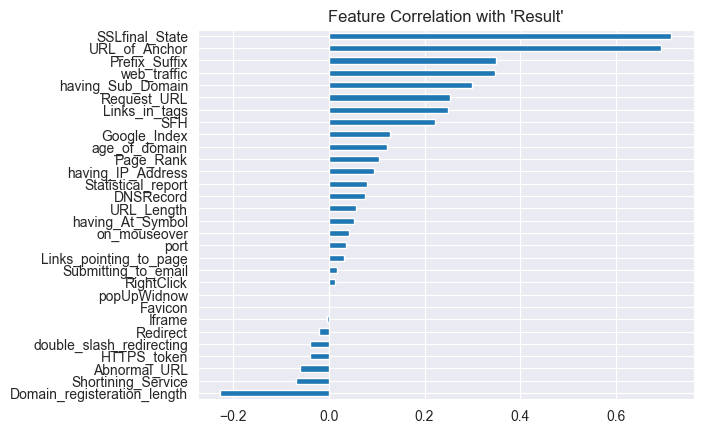

In [18]:
corr_with_target = df.corr()['Result'].drop('Result').sort_values()
corr_with_target.plot(kind='barh', title="Feature Correlation with 'Result'")
plt.show()

We selected a horizontal bar because it is easier to read as we have quite a lot of features.

What is important to mention:
- Some positively correlate features are 'SSLfinal_State', 'URL_of_Anchor', and 'Prefix_Suffix'
- Some negatively correlated features are 'Domain_registration_length' and 'Shortining_Service'

These are candidates for stronger predictors, no matter they are safe or risky.

We can conclude that a positive correlation with 'Result' increases the chance of being legitimate. Meanwhile, a negative correlation represents higher phishing risks. Therefore, our previous analyses over 'Prefix_Suffix' can be misleading alone.

What does not seem relevant at all are 'Favicon' and 'popUpWindnow'.

## Pairplot with two highly relevant features vs 'Result'

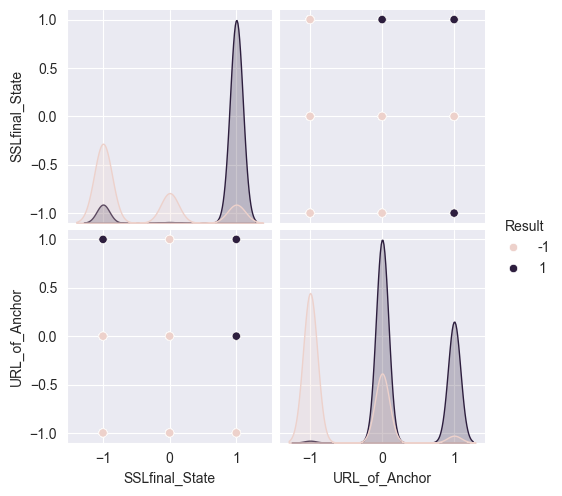

In [22]:
sns.pairplot(df[['SSLfinal_State','URL_of_Anchor','Result']], hue="Result")

This visualization shows how 'SSLfinal_State' and 'URL_of_Anchor' vary between 'Result' values.

- Phishing samples are grouped at -1
- Legitimate samples shift toward 1

There is a clear class separation for both features that we selected.

# Split the data

In [23]:
# Separate the target first
X = df.drop('Result', axis=1)
y = df['Result']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

We applied an 80%-20% split using a random seed of 42. We included this seed as well, because we want to have consistent results. In this way, we make sure that we get the same split every time we run the code.

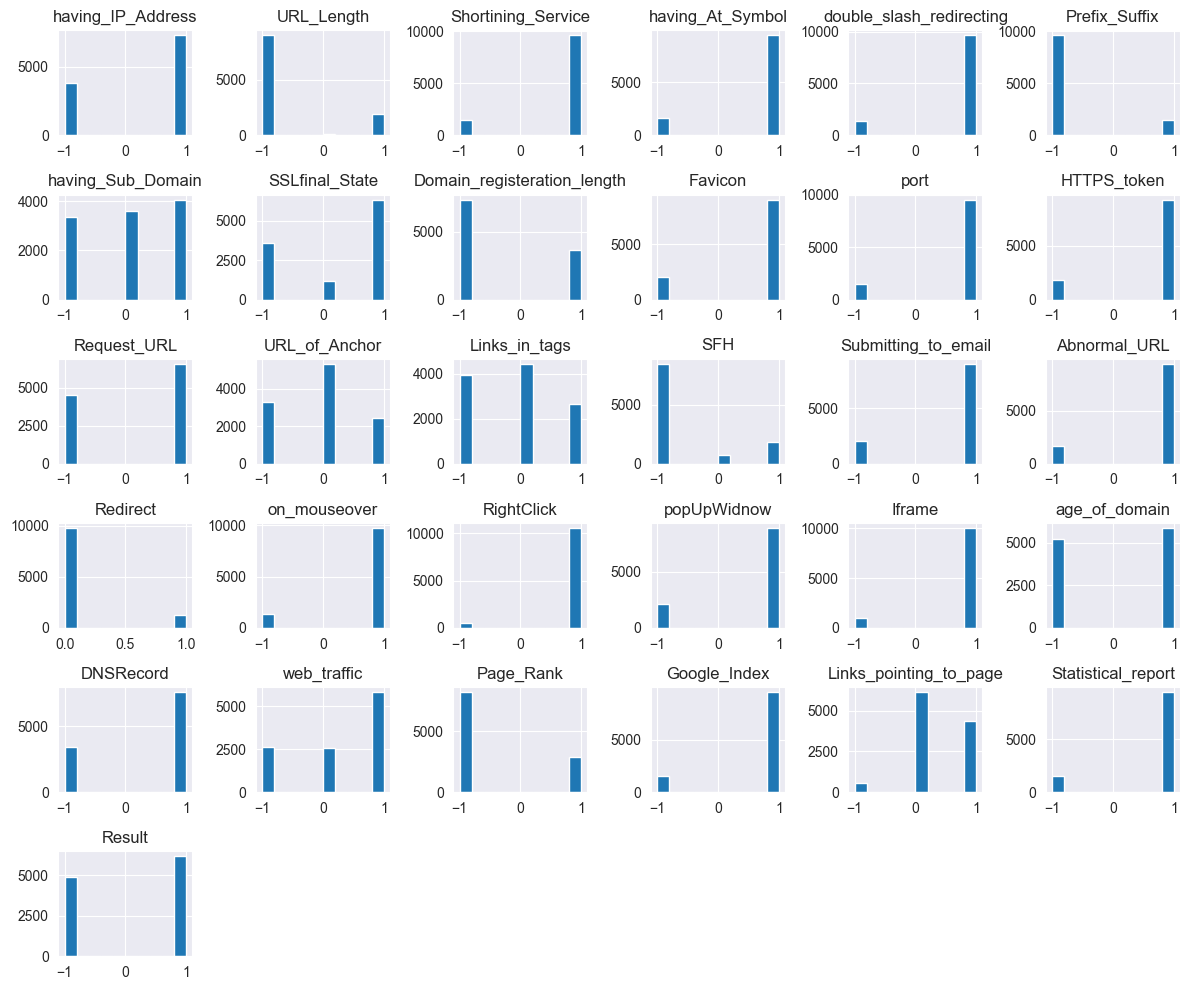

In [25]:
# Plot distributions
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

We mainly included this plot because we wanted to check if scaling is required. As we can see, it is not required for most of the models because all the features are already in the same numeric range.

However, we will scale the data because we also plan to use distance-based models and they require normalization or standardization.

## Prepare a scaled version

In [26]:
# Scale the features
scaler = StandardScaler()

# Fit only on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training phase


Training: LogisticRegression


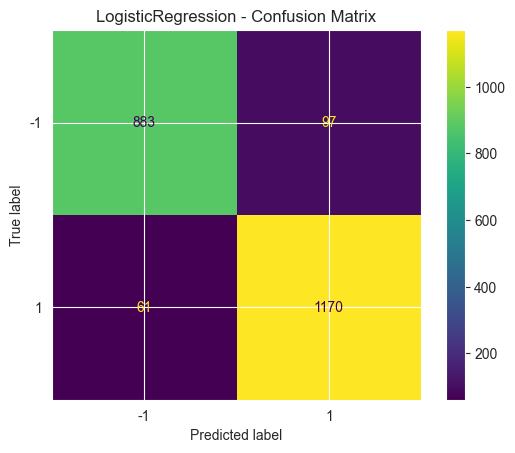


Training: KNeighborsClassifier


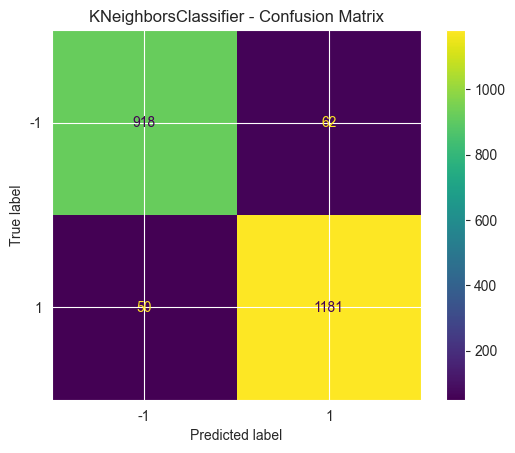


Training: DecisionTreeClassifier


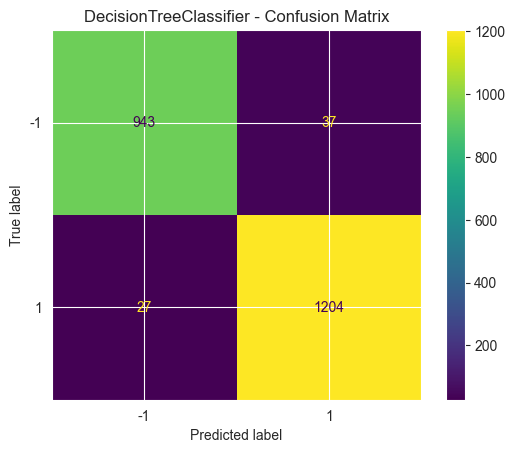

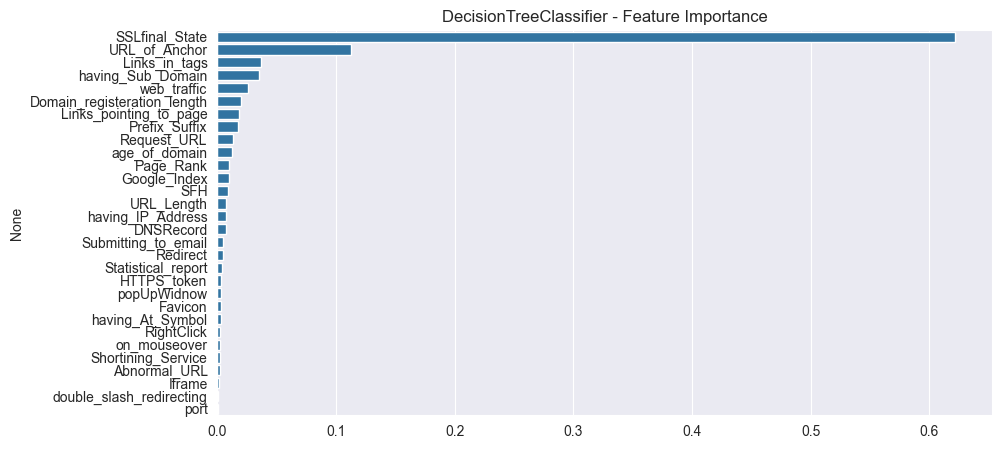


Training: RandomForestClassifier


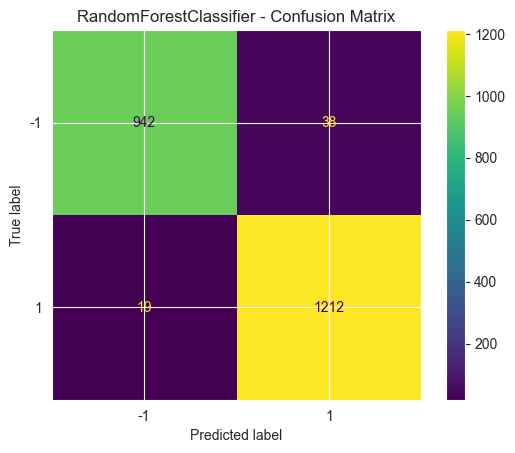

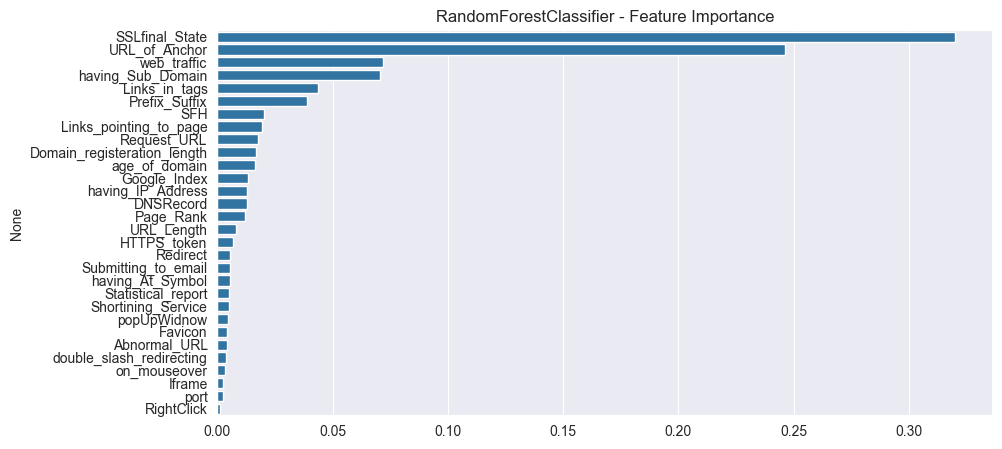

                    Model  Accuracy  Precision    Recall  F1 Score
0      LogisticRegression  0.928539   0.923441  0.950447  0.936749
1    KNeighborsClassifier  0.949344   0.950121  0.959383  0.954729
2  DecisionTreeClassifier  0.971054   0.970185  0.978067  0.974110
3  RandomForestClassifier  0.974220   0.969600  0.984565  0.977025


In [28]:
np.random.seed(42)

# Models to train
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Scaled or not
use_scaled = {
    "LogisticRegression": True,
    "KNeighborsClassifier": True,
    "DecisionTreeClassifier": False,
    "RandomForestClassifier": False
}

results = []

# Train and evaluate
for name, model in models.items():
    print(f"\nTraining: {name}")

    if use_scaled[name]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        X_input = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_input = X_test

    # Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    })

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_input, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Feature Importance if exists
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns if not use_scaled[name] else X.columns  # same columns
        plt.figure(figsize=(10, 5))
        sns.barplot(x=importances[indices], y=feature_names[indices])
        plt.title(f"{name} - Feature Importance")
        plt.show()

# Show results
results_df = pd.DataFrame(results)
print(results_df)

During this semester, we had the opportunity to try out several classifiers from which we selected four of them:
- Logistic Regression
- k-Nearest Neighbors
- Decision Tree
- Random Forest

We achieved a good performance across all metrics. However, Random Forest slightly outperformed the other ones reaching the highest values for Accuracy, Recall, and F1 Score. Moreover, Precision is not bad at all, and the Confusion Matrix confirms that Random Forest classifier had the fewest misclassifications.

When it comes to Feature Importance, we can see the presence of expected features from our initial exploration phase. 'SSLfinal_State' and 'URL_of_Anchor' contributed the most to classification decisions, being consistent across our code.

To conclude, using a set of diversified features helps the model understand the problem much better. It provides more context, and it makes it easier to detect suspicious activities linked to phishing. Random Forest indeed captured complex patterns in the data, improving generalization.